In [1]:
# Importing the necessary libraries for analysis
import numpy as np
import pandas as pd
import json

# Data Visualization libraries
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

#Imporing libraries to avoid warnings
import warnings

In [2]:
# Applying the important settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Importing the data

## Reading the CSV files

In [3]:
# Importing datasets
card = pd.read_csv('/kaggle/input/transactions-fraud-datasets/cards_data.csv')
trans = pd.read_csv('/kaggle/input/transactions-fraud-datasets/transactions_data.csv')
users = pd.read_csv('/kaggle/input/transactions-fraud-datasets/users_data.csv')

## Reading and Manipulating the JSON files 

In [4]:
#Reading the JSON files
with open('/kaggle/input/transactions-fraud-datasets/mcc_codes.json', 'r') as file:
    codes = json.load(file)

with open('/kaggle/input/transactions-fraud-datasets/train_fraud_labels.json', 'r') as file:
    fraud = json.load(file)

In [5]:
fraud_id = list(fraud['target'].keys())
fraud_status = list(fraud['target'].values())

df1 = pd.DataFrame({"id": fraud_id, 'Status': fraud_status})
df1.head(3)

,id,Status
0,10649266,No
1,23410063,No
2,9316588,No


In [6]:
code = list(codes.keys())
name = list(codes.values())

df2 = pd.DataFrame({'mcc': code, 'Name': name})
df2.head(3)

,mcc,Name
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"


# Making the datasets ready for analysis

##  Cards data

In [7]:
card.head(3)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No


In [8]:
card.shape

(6146, 13)

In [9]:
# Checking for any duplicated or missing values
print("Total Duplicated values found: ", card.duplicated().sum())

print("Count of null values in each column are as follows: \n", card.isnull().sum())

Total Duplicated values found:  0
Count of null values in each column are as follows: 
 id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64


Result : No missing or duplicated values were found in the data.

In [10]:
# Checking if correct datatypes are assigned to the columns

nuuniq = []
dtyp = []
uuniq = []

for col in card.columns:
    nuuniq.append(card[col].nunique())
    dtyp.append(card[col].dtype)
    uuniq.append(card[col].unique()[0])

result = pd.DataFrame({"Column Name": card.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,6146,int64,4524
1,client_id,2000,int64,825
2,card_brand,4,object,Visa
3,card_type,3,object,Debit
4,card_number,6146,int64,4344676511950444
5,expires,259,object,12/2022
6,cvv,998,int64,623
7,has_chip,2,object,YES
8,num_cards_issued,3,int64,2
9,credit_limit,3654,object,$24295


Considerations
- The column 'card_on_dark_web' has a constant value.

Issues Found:

1. The column 'Expires' and 'acct_open_date' is misassiged as object and should be datetime.
2. 'credit_limit' column is misassigned as object due to the presence of '$' symbol. It should be numeric.



In [11]:
# Fixing the issues found above.

# Converting the relevant columns to datetime
card['expires'] =pd.to_datetime(card['expires'])
card['acct_open_date'] = pd.to_datetime(card['acct_open_date'])

# Fixing the datatype misassignment for 'credit_limit' column
card['credit_limit'] = card['credit_limit'].str.replace('$', '')
card['credit_limit'] = pd.to_numeric(card['credit_limit'])
card.rename(columns = {'credit_limit': 'Credit_Limit($)'})

# Rechecking the datatypes
nuuniq = []
dtyp = []
uuniq = []

for col in card.columns:
    nuuniq.append(card[col].nunique())
    dtyp.append(card[col].dtype)
    uuniq.append(card[col].unique()[0])

result = pd.DataFrame({"Column Name": card.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,6146,int64,4524
1,client_id,2000,int64,825
2,card_brand,4,object,Visa
3,card_type,3,object,Debit
4,card_number,6146,int64,4344676511950444
5,expires,259,datetime64[ns],2022-12-01 00:00:00
6,cvv,998,int64,623
7,has_chip,2,object,YES
8,num_cards_issued,3,int64,2
9,credit_limit,3654,int64,24295


The issues are resolved and the data is ready for analysis

## Users data

In [12]:
users.head(3)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5


**Problem 1:**
A study of the dataset reveals that one can work on customer segmentation to help understand different types of customers.

**Problem 2:**
When `users` data is merged with `card` data, one can work on the regression problem of predicting credit limit for a customer based on the user's data.

In [13]:
# Checking if correct datatypes are assigned to the columns

nuuniq = []
dtyp = []
uuniq = []

for col in users.columns:
    nuuniq.append(users[col].nunique())
    dtyp.append(users[col].dtype)
    uuniq.append(users[col].unique()[0])

result = pd.DataFrame({"Column Name": users.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,2000,int64,825
1,current_age,80,int64,53
2,retirement_age,29,int64,66
3,birth_year,80,int64,1966
4,birth_month,12,int64,11
5,gender,2,object,Female
6,address,1999,object,462 Rose Lane
7,latitude,989,float64,34.15
8,longitude,1224,float64,-117.76
9,per_capita_income,1754,object,$29278


The columns 'per_capita_income', 'yearly_income' and 'total_debt' columns are assigned as object due to the presence of '$'. Resolving the issue and changing the datatype to numeric.

In [14]:
# Removing the '$' sign from the columns
users['per_capita_income'] = users['per_capita_income'].str.replace('$', '')
users['yearly_income'] = users['yearly_income'].str.replace('$', '')
users['total_debt'] = users['total_debt'].str.replace('$', '')

# Changing their datatype to numeric
users['per_capita_income'] = pd.to_numeric(users['per_capita_income'])
users['yearly_income'] = pd.to_numeric(users['yearly_income'])
users['total_debt'] = pd.to_numeric(users['total_debt'])

# Changning the names
users.rename(columns = {"per_capita_income": "per_capita_income($)", "yearly_income" : "yearly_income($)", "total_debt": "total_debt($)"}, inplace = True)

In [15]:
# Verifying the changes
users.dtypes

id                        int64
current_age               int64
retirement_age            int64
birth_year                int64
birth_month               int64
gender                   object
address                  object
latitude                float64
longitude               float64
per_capita_income($)      int64
yearly_income($)          int64
total_debt($)             int64
credit_score              int64
num_credit_cards          int64
dtype: object

The changes have been applied.

In [16]:
# Checking for any null values in the data

users.isnull().sum()

id                      0
current_age             0
retirement_age          0
birth_year              0
birth_month             0
gender                  0
address                 0
latitude                0
longitude               0
per_capita_income($)    0
yearly_income($)        0
total_debt($)           0
credit_score            0
num_credit_cards        0
dtype: int64

The code output clearly states that there is no null values present in the data suggesting that the data is ready for merger.

In [17]:
dfr = pd.merge(users, card, on = 'id', how = 'inner')
dfr.head(3)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income($),yearly_income($),total_debt($),credit_score,num_credit_cards,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,707,Visa,Debit,4468428983030588,2020-02-01,92,YES,1,1862,2020-01-01,2020,No
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,262,Mastercard,Debit (Prepaid),5922455636977986,2021-09-01,516,YES,1,62,2020-02-01,2020,No
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,1593,Mastercard,Debit,5846041795591669,2020-02-01,788,NO,2,13139,2020-02-01,2020,No


## Codes data

In [18]:
df2.head(3)

,mcc,Name
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"


In [19]:
# Checking the datatype of the column on which the merger will take place
df2['mcc'].dtype

dtype('O')

The column 'mcc' is misassigned as 'object' and should be 'int64'

In [20]:
df2['mcc'] = pd.to_numeric(df2['mcc'])

In [21]:
# Checking for any missing values
df2.isnull().sum()

mcc     0
Name    0
dtype: int64

This dataframe is ready to be merged with transaction data.

## Fraud data

In [22]:
df1.head(3)

,id,Status
0,10649266,No
1,23410063,No
2,9316588,No


In [23]:
df1.shape

(8914963, 2)

In [24]:
df1.isnull().sum()

id        0
Status    0
dtype: int64

In [25]:
# Understanding the data types
df1.dtypes

id        object
Status    object
dtype: object

The column 'id' is misassigned as 'object' and should be 'int64'

In [26]:
df1['id'] = pd.to_numeric(df1['id'])

The data is ready to be merged with the transaction data

## Transaction data

In [27]:
trans.head(3)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN


In [28]:
# Understanding the datatype of the common column.
trans['id'].dtype

dtype('int64')

 Merging the fraud data with the transaction data

In [29]:
df = pd.merge(trans, df1, on='id', how='inner')
df.head(3)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Status
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,No


Merging the MCC code data with the new data

In [30]:
df = pd.merge(df, df2, on = 'mcc', how = 'inner')
df.head(3)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Status,Name
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,No,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,No,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,No,Money Transfer


**Problem 3:**
The above-merged data can be used for classifying fraudulent transactions.

## Data Cleaning

### 1. Checking and validating the datatypes

In [31]:
nuuniq = []
dtyp = []
uuniq = []

for col in df.columns:
    nuuniq.append(df[col].nunique())
    dtyp.append(df[col].dtype)
    uuniq.append(df[col].unique()[0])

result = pd.DataFrame({"Column Name": df.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,8914963,int64,7475327
1,date,3680988,object,2010-01-01 00:01:00
2,client_id,1219,int64,1556
3,card_id,4070,int64,2972
4,amount,70639,object,$-77.00
5,use_chip,3,object,Swipe Transaction
6,merchant_id,66537,int64,59935
7,merchant_city,12173,object,Beulah
8,merchant_state,199,object,ND
9,zip,24586,float64,58523.0


**Observations:**

- The 'Amount' column is wrong wrongly assigned as 'Object' due to the presence of '$' in the value. 

In [32]:
df['amount'] = df['amount'].str.replace('$', '')
df['amount'] = pd.to_numeric(df['amount'])
df.rename(columns = {'amount': 'Amount($)'}, inplace = True)

Issues found:
- Presence of negative values in the account column
- Presence of NAN values in 'errors' column

### 2. Dealing with missing and improper values

**2.1 Missing values**

As the dataset is large enough it isn't easy to get an idea of missing values. Hence using percentages instead.

In [33]:
miss = []
rows = df.shape[0]
per = []

for col in df.columns:
    missing = df[col].isnull().sum()
    miss.append(missing)
    percent = ( missing / rows)*100
    per.append(percent)

res = pd.DataFrame({'Column Name': df.columns, 'Missing Values': miss, 'Percentage of null values': per})
res

,Column Name,Missing Values,Percentage of null values
0,id,0,0.000000
1,date,0,0.000000
2,client_id,0,0.000000
3,card_id,0,0.000000
4,Amount($),0,0.000000
5,use_chip,0,0.000000
6,merchant_id,0,0.000000
7,merchant_city,0,0.000000
8,merchant_state,1047865,11.754003
9,zip,1107377,12.421555


**Dealing with Error column**

In [34]:
df['errors'].unique()

array([nan, 'Bad Expiration', 'Bad Card Number', 'Insufficient Balance',
       'Bad PIN', 'Technical Glitch', 'Bad CVV',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad Zipcode',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration', 'Bad PIN,Technical Glitch',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad CVV,Insufficient Balance',
       'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Expiration,Bad CVV', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

Assumpting that major transactions are generally error-free is reasonable, especially if errors are infrequent. This approach minimises the risk of misinterpretation and maximises the integrity of the dataset. Hence, imputing the nan values with a constant value 'Errorless'

In [35]:
df['errors'].fillna('Errorless', inplace = True)

**Dealing with Merchant State columns**

Filling missing values in the merchant_state column with the mode ensures consistency by using the most common value, which likely represents the majority location and minimizes disruption to categorical distributions. 

In [36]:
df['merchant_state'].fillna(df['merchant_state'].mode()[0], inplace = True)

**Dealing with zip column**

Studying the box-plot of the 'zip' column to identify the proper imputation technique

<Axes: >

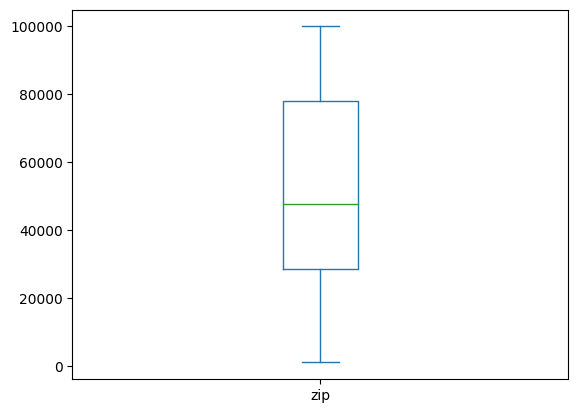

In [37]:
df['zip'].plot(kind = 'box')

As the box plot represents normal distribution, mean imputation seems to be a reasonable technique as there are no outliers. 

In [38]:
df['zip'].fillna(df['zip'].mean(), inplace = True)

**Rechecking for any null values**

In [39]:
df.isnull().sum()

id                0
date              0
client_id         0
card_id           0
Amount($)         0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
Status            0
Name              0
dtype: int64

**Interpretation:** 

All the null values are handled.

**2.2. Handling invalid values**

The 'Amount' column is suspected to have some invalid values.


In [40]:
amt = df['Amount($)'].sort_values(ascending = True)
amt 

7748590    -500.00
3015857    -500.00
4832944    -500.00
4118584    -500.00
485663     -500.00
            ...   
186889     4978.45
7098274    5155.36
8168666    5591.73
4230064    5696.78
8206313    6613.44
Name: Amount($), Length: 8914963, dtype: float64

In [41]:
amt_below = df[df['Amount($)'] <= 0]
amt_below.shape

(449972, 14)

The rationale for interpreting the Amount column with both positive and negative values as representing credits and debits to a consumer's account is grounded in standard financial transaction conventions

1. Logical Consistency: Positive values are typically associated with deposits or credits, while negative values indicate debits or withdrawals. This assumption aligns with standard accounting practices, making the data more intuitive for analysis.

2. Enhanced Interpretability: Treating positive amounts as credits and negative amounts as debits allows for straightforward interpretations and calculations of net balances, transaction patterns, and consumer behavior.

3. Simplified Analysis and Modeling: By defining these value signs as credit and debit indicators, we streamline analytical tasks such as identifying high-expenditure consumers or tracking cash flow patterns, both of which are essential for generating actionable insights.

This assumption provides a practical framework for interpreting and working with the Amount data in a way that enhances analytical depth and maintains alignment with common financial practices.

In [42]:
amount = df['Amount($)']
payment_status = []

for val in amount:
    if val < 0:
        payment_status.append('Debit')
    else:
        payment_status.append('Credit')

df['Payment_Type'] = payment_status

Treating the negative values in the feature exploration section to conduct in-depth analysis.

### 3. Improving readability

In [43]:
df.columns

Index(['id', 'date', 'client_id', 'card_id', 'Amount($)', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'Status', 'Name', 'Payment_Type'],
      dtype='object')

In [44]:
df.rename(columns = {"id": "ID", 'date': 'Date', 'client_id': 'CID', 'Amount($)': 'Amount', 'use_chip': 'UseChip', 'merchant_id': 'MID', 'merchant_city': 'MCity', 'merchant_state': 'MState', 'zip': 'Pincode', 'mcc': 'MCC', 'errors': 'Error', 'Status': 'Fraud_Status', 'Name': 'Category'}, inplace = True)

In [45]:
df.head(3)

,ID,Date,CID,card_id,Amount,UseChip,MID,MCity,MState,Pincode,MCC,Error,Fraud_Status,Category,Payment_Type
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,Errorless,No,Miscellaneous Food Stores,Debit
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,Errorless,No,Department Stores,Credit
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,Errorless,No,Money Transfer,Credit


## Feature Engineering for Analysis

1. Creating a "Payment_Status" variable to distinguish between the type of payment

In [46]:
# Already executed in the earlier code
'''
amount = df['Amount($)']
payment_status = []

for val in amount:
    if val < 0:
        payment_status.append('Debit')
    else:
        payment_status.append('Credit')

df['Payment_Type'] = payment_status
'''

"\namount = df['Amount($)']\npayment_status = []\n\nfor val in amount:\n    if val < 0:\n        payment_status.append('Debit')\n    else:\n        payment_status.append('Credit')\n\ndf['Payment_Type'] = payment_status\n"

2. Breaking the date variable

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

## Dataset for Analysis

In [48]:
df.head(3)

,ID,Date,CID,card_id,Amount,UseChip,MID,MCity,MState,Pincode,MCC,Error,Fraud_Status,Category,Payment_Type,Day,Month
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,Errorless,No,Miscellaneous Food Stores,Debit,1,1
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,Errorless,No,Department Stores,Credit,1,1
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,Errorless,No,Money Transfer,Credit,1,1


# Analysis on classification dataset 

## Fraud Status column

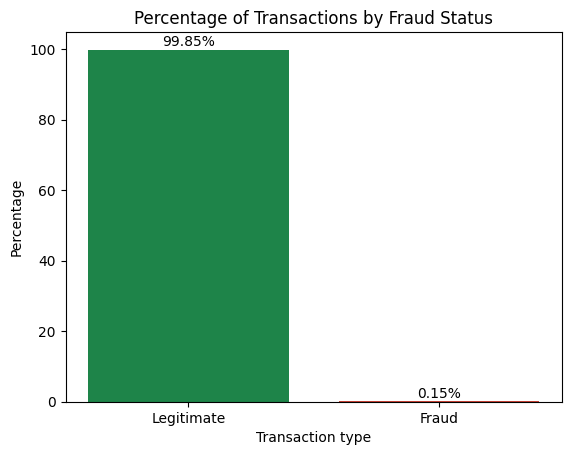

In [49]:
per = df['Fraud_Status'].value_counts(normalize = True)*100

legit = per[0]
fraud = per[1]

percentages = [legit, fraud]
labels = ['Legitimate', 'Fraud']

# Bar chart
plt.bar(labels, percentages, color = ['#1e8449', '#cb4335'])
plt.title('Percentage of Transactions by Fraud Status')
plt.xlabel('Transaction type')
plt.ylabel('Percentage')

for i, v in enumerate(percentages):
  plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center')

plt.show()

**Interpretation:**

One can see major imbalance in the fraud status column. 

**Considerations:**

If a classification task is to be performed then it is important to ensure balanced learning for the model, considering the imbalance a hybrid strategy of undersampling of the majority class and oversampling of the minority class seems like a god option to consider.

## Amount Column



In [50]:
# Statistical Distribution of the Amount variable 
print('Percentile Values')
print(df['Amount'].quantile([0.0, 0.25, 0.5, 0.75, 1]))

Percentile Values
0.00    -500.00
0.25       8.93
0.50      28.99
0.75      63.68
1.00    6613.44
Name: Amount, dtype: float64


Interpretation:
- The last 25 percentile has the amount which shows credit values more than 100.

In [51]:
# Removing the negative sign as the amount cannot be negative
#To handle the positives and negatives the 'Payment_Status' column has been introduced.

df['Amount'] = df['Amount'].astype('str')
df['Amount'] = df['Amount'].str.replace('-', '')
df['Amount'] =pd.to_numeric(df['Amount'])


In [52]:
# Statistical Distribution of the entire Amount variable without any negative signs 
print('Percentile Values')
print(df['Amount'].quantile([0.0, 0.25, 0.5, 0.75, 1]))

Percentile Values
0.00       0.00
0.25      11.75
0.50      34.81
0.75      70.97
1.00    6613.44
Name: Amount, dtype: float64


The overall 'Amount' column when analysed showed the similar nature suggesting further investigation for the last 25 percentile for fraud.

In [53]:
amt = df[df['Amount'] > 71.00 ]
amt['Fraud_Status'].value_counts()

Fraud_Status
No     2205111
Yes       7081
Name: count, dtype: int64

In [54]:
# INVESTIGATING FURTHER TO UNDERSTAND IF THERE IS A CERTAIN RANGE OF AMOUNT FOR FRAUDULENT TRANSACTIONS

amt_fraud = amt[amt['Fraud_Status'] == 'Yes']
amt_legit = amt[amt['Fraud_Status'] == 'No']

In [55]:
# Summary Statistics for the last 25th percentile (Which are fraud)
print('Fraud transaction summary stats:')
print("Mean: ", amt_fraud['Amount'].mean())
amt_fraud['Amount'].quantile([0, 0.25, 0.5, 0.75, 1])

Fraud transaction summary stats:
Mean:  223.32411523796074


0.00      71.01
0.25     105.30
0.50     154.67
0.75     258.00
1.00    4978.45
Name: Amount, dtype: float64

In [56]:
# Summary Statistics for the last 25th percentile (Which are legitimate)
print('Legitimate transactions summmary stats:')
print('Mean: ', amt_legit['Amount'].mean())
amt_legit['Amount'].quantile([0, 0.25, 0.5, 0.75, 1])

Legitimate transactions summmary stats:
Mean:  134.2548512025019


0.00      71.01
0.25      83.00
0.50      99.85
0.75     140.00
1.00    6613.44
Name: Amount, dtype: float64

There can be seen a slight difference between fraud and legitimate transactions, the fraud transactions show a high range of Amount values when compared to the legitimate ones.

**Summary of the insights found from the 'Amount' column:**

The analysis of the 'Amount' column highlighted that values in the lower 25th percentile, initially negative (indicating credits above 100), were corrected by removing the negative sign since transaction amounts cannot be negative. To clearly distinguish between credit and debit transactions, a new 'Payment_Status' column was introduced. Upon analyzing the adjusted 'Amount' column, the distribution indicated a similar overall pattern but suggested a need for deeper investigation into the last 25th percentile for potential fraudulent activity. Further exploration revealed that fraudulent transactions tend to have higher 'Amount' values compared to legitimate ones within this range. This finding suggests a potential link between higher transaction amounts in this percentile and fraudulent activity

## Category column

In [57]:
fraud = df[df['Fraud_Status'] == 'Yes']
legit = df[df['Fraud_Status'] == 'No']

print("Total categories present in the data: ", df['Category'].nunique())
print("Categories involved in fraud transactions: ", fraud['Category'].nunique())

Total categories present in the data:  108
Categories involved in fraud transactions:  97


Most of the categories are involved in the fraud, further analysis can be performed to investigate if some categories are more involved in the fraud.

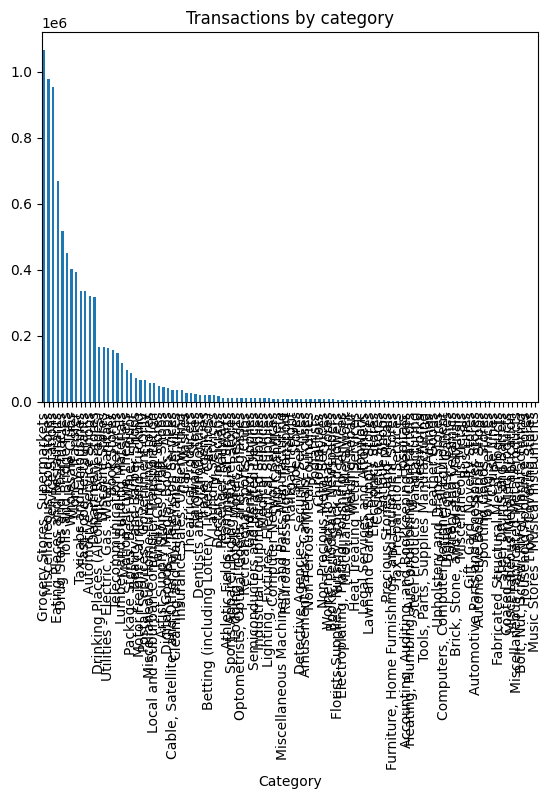

In [58]:
df['Category'].value_counts().plot(kind = 'bar')
plt.title('Transactions by category')
plt.show()

It can be inferred from the above visualization that there are some categories which have a lot of transactions and some have very less transactions showing non-uniform distribution.

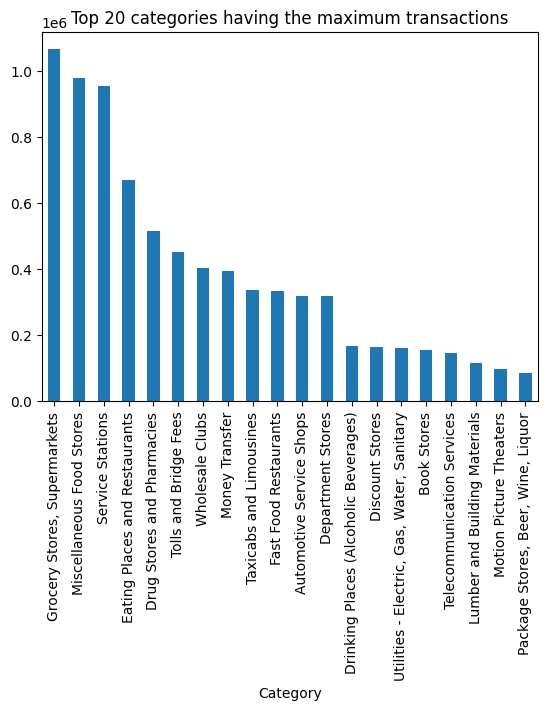

In [59]:
df['Category'].value_counts().head(20).plot(kind = 'bar')
plt.title('Top 20 categories having the maximum transactions')
plt.show()

'Grocery stores, supermarkets', and 'Miscellaneous Food Stores' are the categories having the maximum number of transactions. Investigating the fraudulent transactions would help us understand and identify trends for fraudulent transactions.

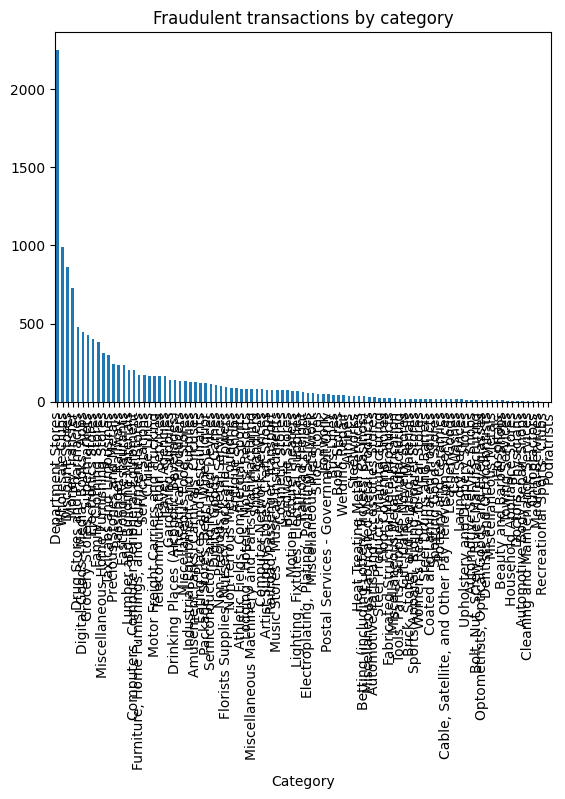

In [60]:
fraud['Category'].value_counts().plot(kind = 'bar')
plt.title('Fraudulent transactions by category')
plt.show()

A similar distribution can be seen for the fraudulent transactions as well

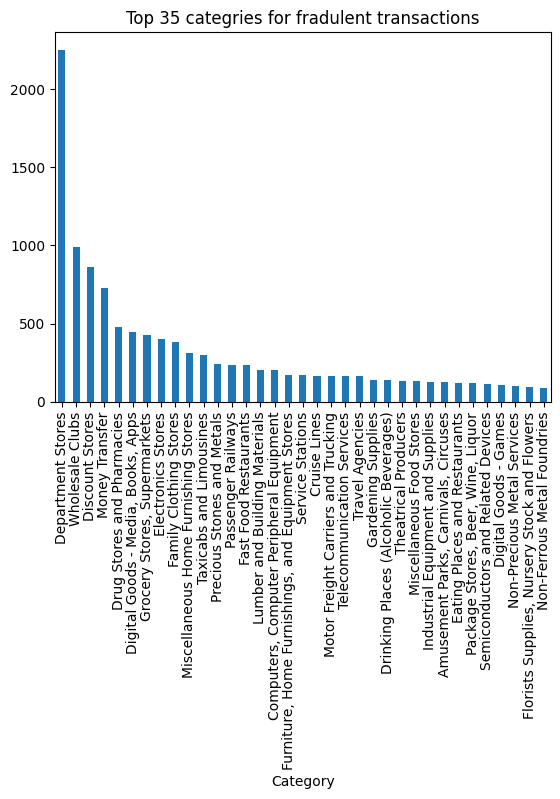

In [61]:
fraud['Category'].value_counts().sort_values(ascending = False).head(35).plot(kind = 'bar')
plt.title('Top 35 categries for fradulent transactions')
plt.show()

Different categories can be seen at which top of the table for fraudulent transactions. Investigating the top legitimate transaction categories might determine the difference between the two transaction types.

Text(0.5, 1.0, 'Legitimate transactions by categories')

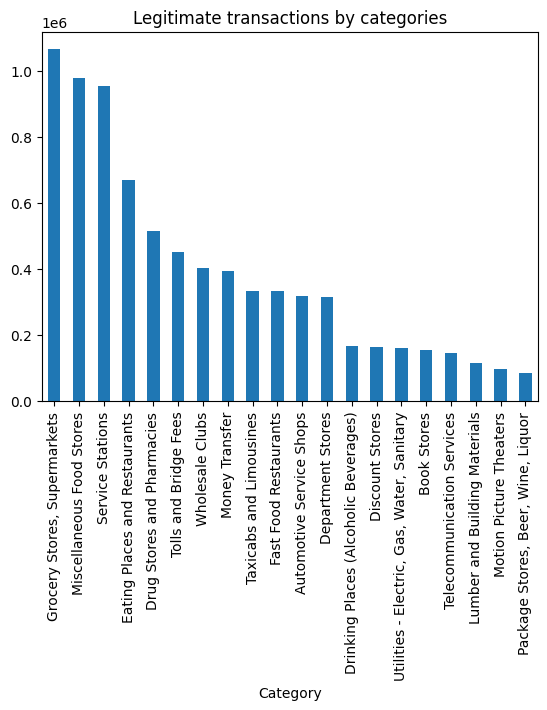

In [62]:
legit['Category'].value_counts().sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.title('Legitimate transactions by categories')

The top categories for legitimate transactions and fraudulent transactions are different which state that the 'Categorical' has a certain predictive power towards classifying transactions as fraud and legitimate.